## Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

# Facebook's Prophet Library

## Importing the Data

👇 Go to [trends.google.com](https://trends.google.com/trends/?geo=US) and retrieve the dataset representing the interest over time of the keyword `data science` since 2004 in the US. Once you get the dataset, import the data and display the first few rows

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1GTup48HKTMqT9ZWI02vG65thl7zEBPLK')

## Displaying the Data

👇Visualize the data by displaying the first few rows of the dataframe

In [ ]:
df

,Month,data science: (United States)
0,2004-01,17
1,2004-02,13
2,2004-03,11
3,2004-04,6
4,2004-05,6
...,...,...
195,2020-04,82
196,2020-05,80
197,2020-06,78
198,2020-07,77


## Data Preprocessing

Facebook's Prophet library requires the data to be in a specific format

👇 Format the dataset as per Facebook Prophet's requirements. Remember, the DataFrame should have both a `ds` and a `y` column.

In [ ]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

df.head()

,ds,y
0,2004-01-01,17
1,2004-02-01,13
2,2004-03-01,11
3,2004-04-01,6
4,2004-05-01,6


## Plotting the Data

👇 Plot the data

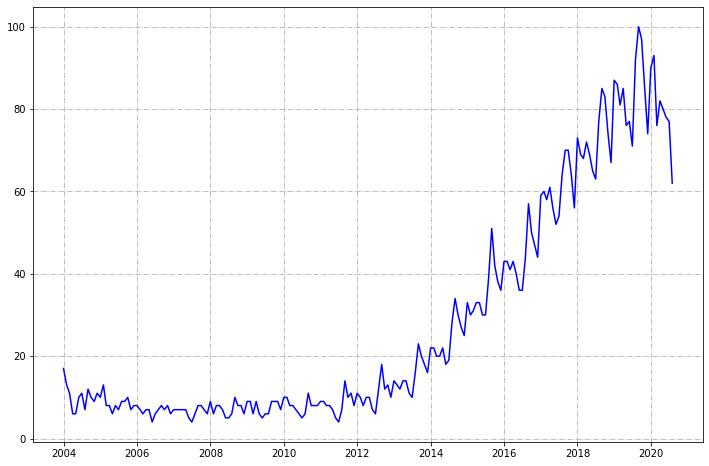

In [ ]:
plt.figure(figsize=(12, 8))
plt.grid(linestyle='-.')

plt.plot(df['ds'], df['y'], 'b')
plt.show()

## Fitting the Data

👇 Fit the data using Facebook's Prophet library. Make sure to use a train/test split.

In [ ]:
train = df.iloc[:176]
test = df.iloc[176:]

In [ ]:
train.shape, test.shape

((176, 2), (24, 2))

In [ ]:
train

,ds,y
0,2004-01-01,17
1,2004-02-01,13
2,2004-03-01,11
3,2004-04-01,6
4,2004-05-01,6
...,...,...
171,2018-04-01,72
172,2018-05-01,69
173,2018-06-01,65
174,2018-07-01,63


In [ ]:
model = Prophet(seasonality_mode='multiplicative', interval_width=0.95)
model.fit(train)

/home/bruncky/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
10:33:28 - cmdstanpy - INFO - Chain [1] start processing
10:33:28 - cmdstanpy - INFO - Chain [1] done processing


## Make Future Predictions

👇Before predicting future values with Facebook's Prophet library, you first need to create a placeholder DataFrame that will eventually hold the predictions. Once you create the DataFrame, try to predict 2 years in the future.

You can create the predictions DataFrame using `make_future_dataframe()`

In [ ]:
horizon = 36
future = model.make_future_dataframe(periods=horizon, freq='MS')

forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
207,2021-04-01,109.277004,103.178949,115.448042
208,2021-05-01,102.490129,96.293565,109.286972
209,2021-06-01,93.953706,88.418711,99.992286
210,2021-07-01,93.477102,86.957318,99.481465
211,2021-08-01,113.179363,106.032455,120.378927


## Plotting the Forecast

👇 It's time to visualize our forecast. Try to first plot it using [`model.plot(forecast)`](https://facebook.github.io/prophet/docs/quick_start.html)

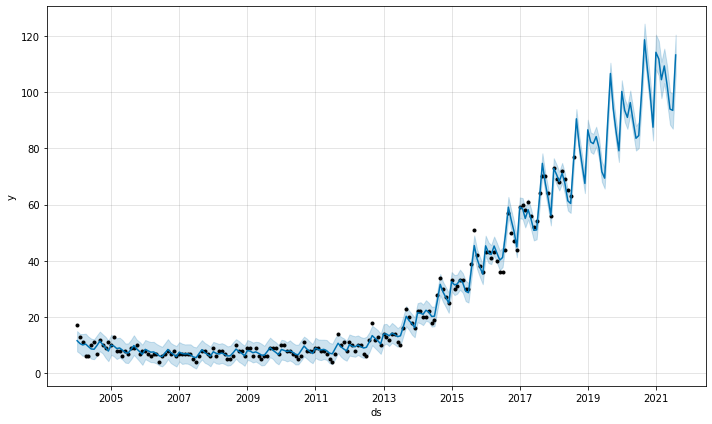

In [ ]:
ax = model.plot(forecast);

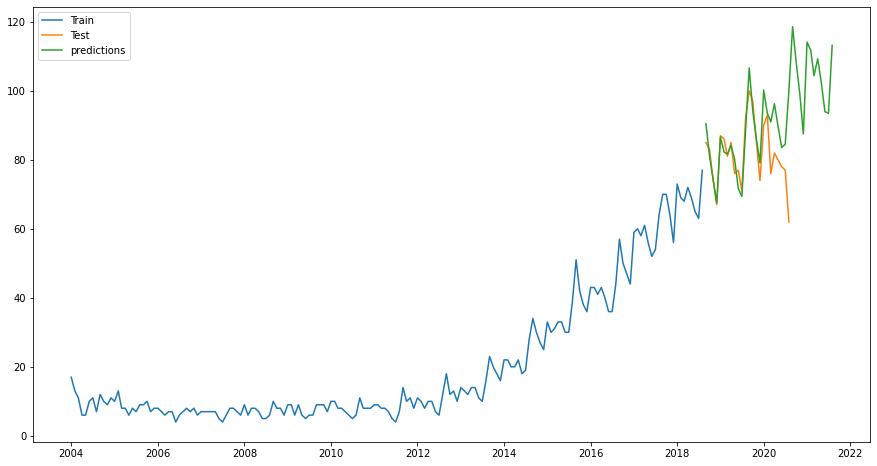

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(train['ds'], train['y'], label="Train")
plt.plot(test['ds'], test['y'], label="Test")
plt.plot(forecast[-horizon:]['ds'], forecast[-horizon:]['yhat'], label="predictions")
plt.legend(loc="best")
plt.show()

👉 From 2004 to 2018 we can see the train data, as well as the forecasted data from 2018 to 2020.

We can also notice a shaded region behind the plot which represents the 95% uncertainty interval.

The black dots represent the original data

## Time Series' Trend and Seasonality

👇 Plot the trend and yearly seasonality of the Time Series. This can be done using the `plot_components()` function from Facebook's Prophet Library

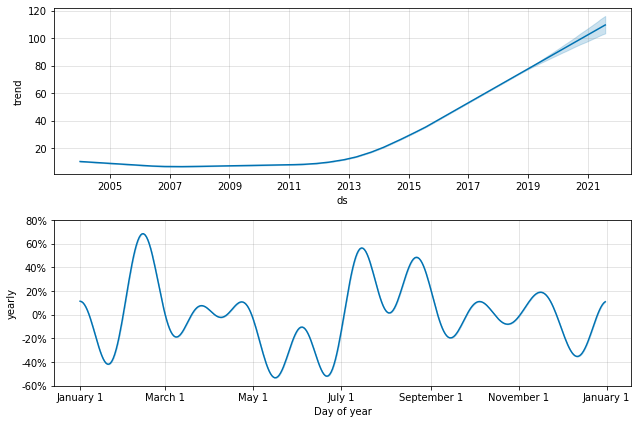

In [ ]:
model.plot_components(forecast);

## Evaluating the Model with Cross-Validation!

👇 Using `cross_validation()` and `performance_metrics()` from [prophet.diagnostics](https://facebook.github.io/prophet/docs/diagnostics.html), evaluate the performance of your model

More precisely, create a Time Series K-fold CV with
- train sets of size 5 years
- horizon val sizes of 1 year
- shifting each fold by 180 days

<img src="https://wagon-public-datasets.s3-eu-west-1.amazonaws.com/05-Machine-Learning/09-Time-Series/prophet_train_test_split.png" width=850>

In [ ]:
cv_results = cross_validation(model=model, initial=f'{365 * 5} days', horizon='365 days', period='180 days')
cv_results

  0%|          | 0/18 [00:00<?, ?it/s]

10:33:36 - cmdstanpy - INFO - Chain [1] start processing
10:33:36 - cmdstanpy - INFO - Chain [1] done processing
10:33:36 - cmdstanpy - INFO - Chain [1] start processing
10:33:37 - cmdstanpy - INFO - Chain [1] done processing
10:33:37 - cmdstanpy - INFO - Chain [1] start processing
10:33:37 - cmdstanpy - INFO - Chain [1] done processing
10:33:38 - cmdstanpy - INFO - Chain [1] start processing
10:33:38 - cmdstanpy - INFO - Chain [1] done processing
10:33:38 - cmdstanpy - INFO - Chain [1] start processing
10:33:39 - cmdstanpy - INFO - Chain [1] done processing
10:33:39 - cmdstanpy - INFO - Chain [1] start processing
10:33:39 - cmdstanpy - INFO - Chain [1] done processing
10:33:39 - cmdstanpy - INFO - Chain [1] start processing
10:33:40 - cmdstanpy - INFO - Chain [1] done processing
10:33:40 - cmdstanpy - INFO - Chain [1] start processing
10:33:40 - cmdstanpy - INFO - Chain [1] done processing
10:33:40 - cmdstanpy - INFO - Chain [1] start processing
10:33:40 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2009-04-01,5.751318,3.790201,7.856141,9,2009-03-16
1,2009-05-01,5.326924,3.056648,7.576309,6,2009-03-16
2,2009-06-01,5.545936,3.220246,7.661334,5,2009-03-16
3,2009-07-01,5.753378,3.513068,8.072570,6,2009-03-16
4,2009-08-01,5.892882,3.756223,7.995722,6,2009-03-16
...,...,...,...,...,...,...
211,2018-04-01,69.294789,65.900821,72.774046,72,2017-08-01
212,2018-05-01,65.561687,61.959044,69.053441,69,2017-08-01
213,2018-06-01,57.005809,53.451135,60.459110,65,2017-08-01
214,2018-07-01,56.937480,53.393675,60.260825,63,2017-08-01


In [ ]:
df_p = performance_metrics(cv_results)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,18.390698,4.288438,3.555583,0.164577,0.141773,0.182401,0.428571
1,40 days,20.152741,4.489180,3.819254,0.175714,0.148686,0.196279,0.380952
2,42 days,18.783442,4.333987,3.676889,0.166928,0.148686,0.184666,0.380952
3,45 days,19.853554,4.455733,3.823557,0.166798,0.148686,0.184509,0.333333
4,46 days,18.171787,4.262838,3.570807,0.159757,0.141773,0.175936,0.380952
...,...,...,...,...,...,...,...,...
165,359 days,37.364961,6.112689,4.848456,0.200231,0.153913,0.236676,0.333333
166,360 days,40.461944,6.360970,5.227661,0.205692,0.153913,0.242544,0.285714
167,361 days,40.125187,6.334444,5.134007,0.202960,0.153913,0.239951,0.309524
168,364 days,39.868476,6.314149,5.086825,0.198937,0.153913,0.236127,0.333333


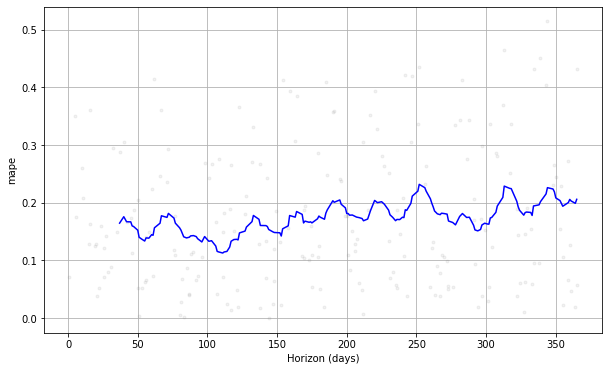

In [ ]:
# Plot results below
plot_cross_validation_metric(cv_results, metric='mape');

⚠️ Don't forget to push the challenge to GitHub once you're done 😄